# 第五题(选做)：实现n层感知机

实验内容：
1. 数据集不限
2. 激活函数不限
3. 损失函数不限

要求给出以下内容的总结：
1. 数据集描述 
2. 预处理方法及步骤 
3. 模型架构：层数，激活函数，损失函数 
4. 神经网络超参数：学习率，迭代轮数 
5. 训练集和测试集精度 
6. 损失值变化曲线 
7. 代码注释 

# 数据描述

MNIST是最有名的手写数字数据集之一，主页：http://yann.lecun.com/exdb/mnist/

MNIST手写数字数据集有60000个样本组成的训练集，10000个样本组成的测试集，是NIST的子集。数字的尺寸都是归一化后的，且都在图像的中央。可以从上方的主页下载。

我们使用的数据集是kaggle手写数字识别比赛中的训练集。数据集一共42000行，785列，其中第1列是标记，第2列到第785列是图像从左上角到右下角的像素值。图像大小为28×28像素，单通道的灰度图像。

我们使用的是kaggle提供的MNIST手写数字识别比赛的训练集。这个数据集还是手写数字的图片，只不过像素变成了 $28 \times 28$，图片的尺寸变大了，而且数据集的样本量也大了。我们取30%为测试集，70%为训练集。训练集样本数有29400个，测试集12600个。

# 数据处理
本次实验使用sklearn.neural_network.MLPClassifier完成手写数字分类任务
## 对数据进行标准化
神经网络的训练方法一般是基于梯度的优化算法，如梯度下降，为了让这类算法能更好的优化神经网络，我们往往需要对数据集进行归一化，这里我们选择对数据进行标准化

$$X' = \frac{X - \bar{X}}{\mathrm{std}(X)}$$

其中，$\bar{X}$是均值，$\mathrm{std}$是标准差。减去均值可以让数据以0为中心，除以标准差可以让数据缩放到一个较小的范围内。这样可以使得梯度的下降方向更多样，同时缩小梯度的数量级，让学习变得稳定。  
首先需要对训练集进行标准化，针对每个特征求出其均值和标准差，然后用训练集的每个样本减去均值除以标准差，就得到了新的训练集。然后用测试集的每个样本，减去训练集的均值，除以训练集的标准差，完成对测试集的标准化。

In [1]:
#导入数据集
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/kaggle_mnist/mnist_train.csv')
X = data.values[:, 1:].astype('float32')
Y = data.values[:, 0]

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, random_state = 32)

trainY_mat = np.zeros((len(trainY), 10))
trainY_mat[np.arange(0, len(trainY), 1), trainY] = 1

testY_mat = np.zeros((len(testY), 10))
testY_mat[np.arange(0, len(testY), 1), testY] = 1

In [2]:
X.shape

(42000, 784)

In [3]:
len(X)

42000

In [4]:
trainX.shape, trainY.shape, trainY_mat.shape, testX.shape, testY.shape, testY_mat.shape

((29400, 784), (29400,), (29400, 10), (12600, 784), (12600,), (12600, 10))

In [5]:
# 对前10张图进行可视化
import matplotlib.pyplot as plt
%matplotlib inline

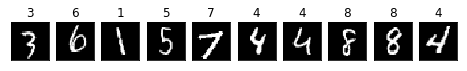

In [6]:
_, figs = plt.subplots(1, 10, figsize=(8, 4))
for f, img, lbl in zip(figs, trainX[:10], trainY[:10]):
    f.imshow(img.reshape((28, 28)), cmap = 'gray')
    f.set_title(lbl)
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# 初始化一个标准化器的实例
standard = StandardScaler()

# 对训练集进行标准化，它会计算训练集的均值和标准差保存起来
trainX = standard.fit_transform(trainX)

# 使用标准化器在训练集上的均值和标准差，对测试集进行归一化
testX = standard.transform(testX)

# 使用sklearn中的MLRClassifier模型实现多层感知机

根据查阅官方文档定义得到一下参数作用：
1. activation：用于决定激活函数默认为relu，本处修改为logistic
2. solver：用于决定优化算法，默认为adam，本处修改为sgd
3. learning_rate：'constant'，学习率固定，不衰减
4. hidden_layer_sizes:隐藏层层数和每层隐藏层神经元个数，本处设置为3层每层神经元个数依次为512,128,32
5. learning_rate_init，这个参数需要我们进行调整，这是学习率，本处为0.1
6. max_iter: 设定最大迭代轮数，如果超过这个轮数还没有收敛，就停止训练，并抛出一个warning

本模型为多层（5层）感知机，其由输入层、3层隐藏层和输出层组成，使用logistic激活函数与随机梯度下降优化算法作为损失函数

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
model = MLPClassifier(activation = "logistic",solver = 'sgd', learning_rate = 'constant', hidden_layer_sizes=(512,128,32), learning_rate_init=0.1, max_iter=500)
model.fit(trainX, trainY)
prediction = model.predict(testX)
print(prediction.shape)
print(testY.shape)

(12600,)
(12600,)


In [11]:
from sklearn.metrics import accuracy_score

# 测试集精度

In [12]:
accuracy_score(prediction, testY)

0.966984126984127

# 训练集精度

In [13]:
accuracy_score(model.predict(trainX), trainY)

1.0

# 绘制损失值变化曲线

Text(0,0.5,'loss')

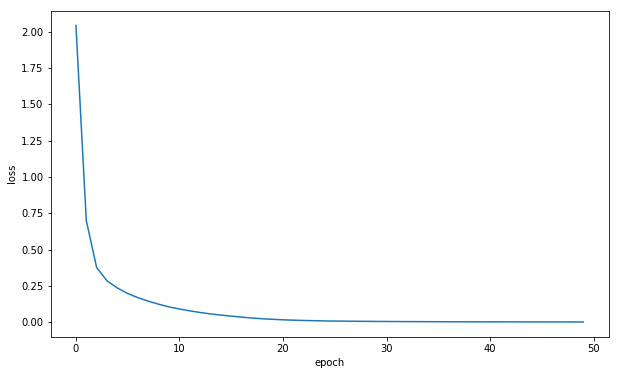

In [14]:
plt.figure(figsize = (10, 6))
plt.plot(model.loss_curve_)
plt.xlabel('epoch')
plt.ylabel('loss')